In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [3]:
train_data_mat = train_data.as_matrix()
test_data_mat = test_data.as_matrix()
y_train = train_data_mat[:,0]
X_train = train_data_mat[:, 1:].reshape((train_data.shape[0], 28, 28, 1))
X_test = test_data_mat[:, :].reshape((test_data.shape[0], 28, 28, 1))
print('y_train shape:{}, X_train shape:{}, X_test shape:{}'.format(y_train.shape, X_train.shape, X_test.shape))

y_train shape:(42000,), X_train shape:(42000, 28, 28, 1), X_test shape:(28000, 28, 28, 1)


/home/yohai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/yohai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


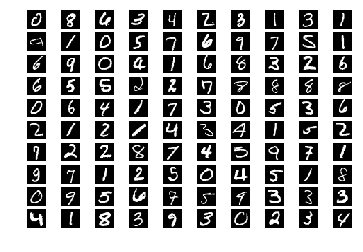

In [4]:
fig , axes = plt.subplots(10,10)
image = np.random.randint(0, X_train.shape[0], 100)
for i, ax in zip(image, axes.reshape(-1)):
    ax.imshow(X_train[i, :, :, 0], cmap='gray')
    ax.axis('off')
plt.show()

In [5]:
x_mean  = np.mean(X_train)
x_std = np.std(X_train)
X_train = (X_train - x_mean) / x_std
X_test = (X_test - x_mean) / x_std

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten, Activation, Input, MaxPooling2D, Dropout, Conv2D
from keras.initializers import VarianceScaling, Zeros
from keras import Model
from keras.utils import np_utils
import tensorflow as tf

In [7]:
y_train = np_utils.to_categorical(y_train, 10)

In [10]:
initializer = VarianceScaling(scale=2.0)
zero_initializer = Zeros()
model = Sequential([
        Conv2D(
            filters=32,
            kernel_size=5,
            padding='same',
            activation='relu',
            use_bias=True,
            kernel_initializer = initializer,
            bias_initializer = zero_initializer
        ),
        Conv2D(
            filters=16,
            kernel_size=3,
            padding='same',
            activation='relu',
            use_bias=True,
            kernel_initializer = initializer,
            bias_initializer = zero_initializer
        ),
        MaxPooling2D(
            pool_size=(2, 2)
        ),
        Dropout(
            rate = 0.2
        ),
        Conv2D(
            filters=16,
            kernel_size=3,
            padding='same',
            activation='relu',
            use_bias=True,
            kernel_initializer = initializer,
            bias_initializer = zero_initializer
        ),
        MaxPooling2D(
            pool_size=(2, 2)
        ),
        Dropout(
            rate = 0.2
        ),
        Flatten(
        ),
        Dense(
            units=1000,
            use_bias=True,
            kernel_initializer = initializer,
            bias_initializer = zero_initializer,
            activation='relu'
        ),
        Dense(
            units=10,
            use_bias=True,
            kernel_initializer = initializer,
            bias_initializer = zero_initializer,
            activation='softmax'
        )
]
)

In [11]:
optimaizer  = tf.train.MomentumOptimizer(0.01, 0.9)
model.compile(optimizer=optimaizer,
              loss='mean_squared_error',
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train,                # Train the model using the training set...
          batch_size=32, epochs=5,
          verbose=1, validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 86s 2ms/step - loss: 0.0083 - acc: 0.9447 - val_loss: 0.0050 - val_acc: 0.9674
Epoch 2/5
37800/37800 [==============================] - 78s 2ms/step - loss: 0.0065 - acc: 0.9579 - val_loss: 0.0040 - val_acc: 0.9736
Epoch 3/5
37800/37800 [==============================] - 90s 2ms/step - loss: 0.0055 - acc: 0.9639 - val_loss: 0.0033 - val_acc: 0.9783
Epoch 4/5
37800/37800 [==============================] - 81s 2ms/step - loss: 0.0048 - acc: 0.9685 - val_loss: 0.0030 - val_acc: 0.9802
Epoch 5/5
37800/37800 [==============================] - 86s 2ms/step - loss: 0.0046 - acc: 0.9700 - val_loss: 0.0029 - val_acc: 0.9807


In [14]:
y_pred = model.predict(X_test)

In [31]:
y_Pred = np.vstack((np.arange(y_pred.shape[0]) + 1, np.argmax(y_pred, axis=1)))
with open("resultTR.csv", "wb") as f:
    f.write(b'ImageId,Label\n')
    np.savetxt(f, y_Pred.T.astype(int), fmt='%i', delimiter=",")